Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Import Data

In [2]:
df = pd.read_csv('data/data.csv')

Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [6]:
df.isnull().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

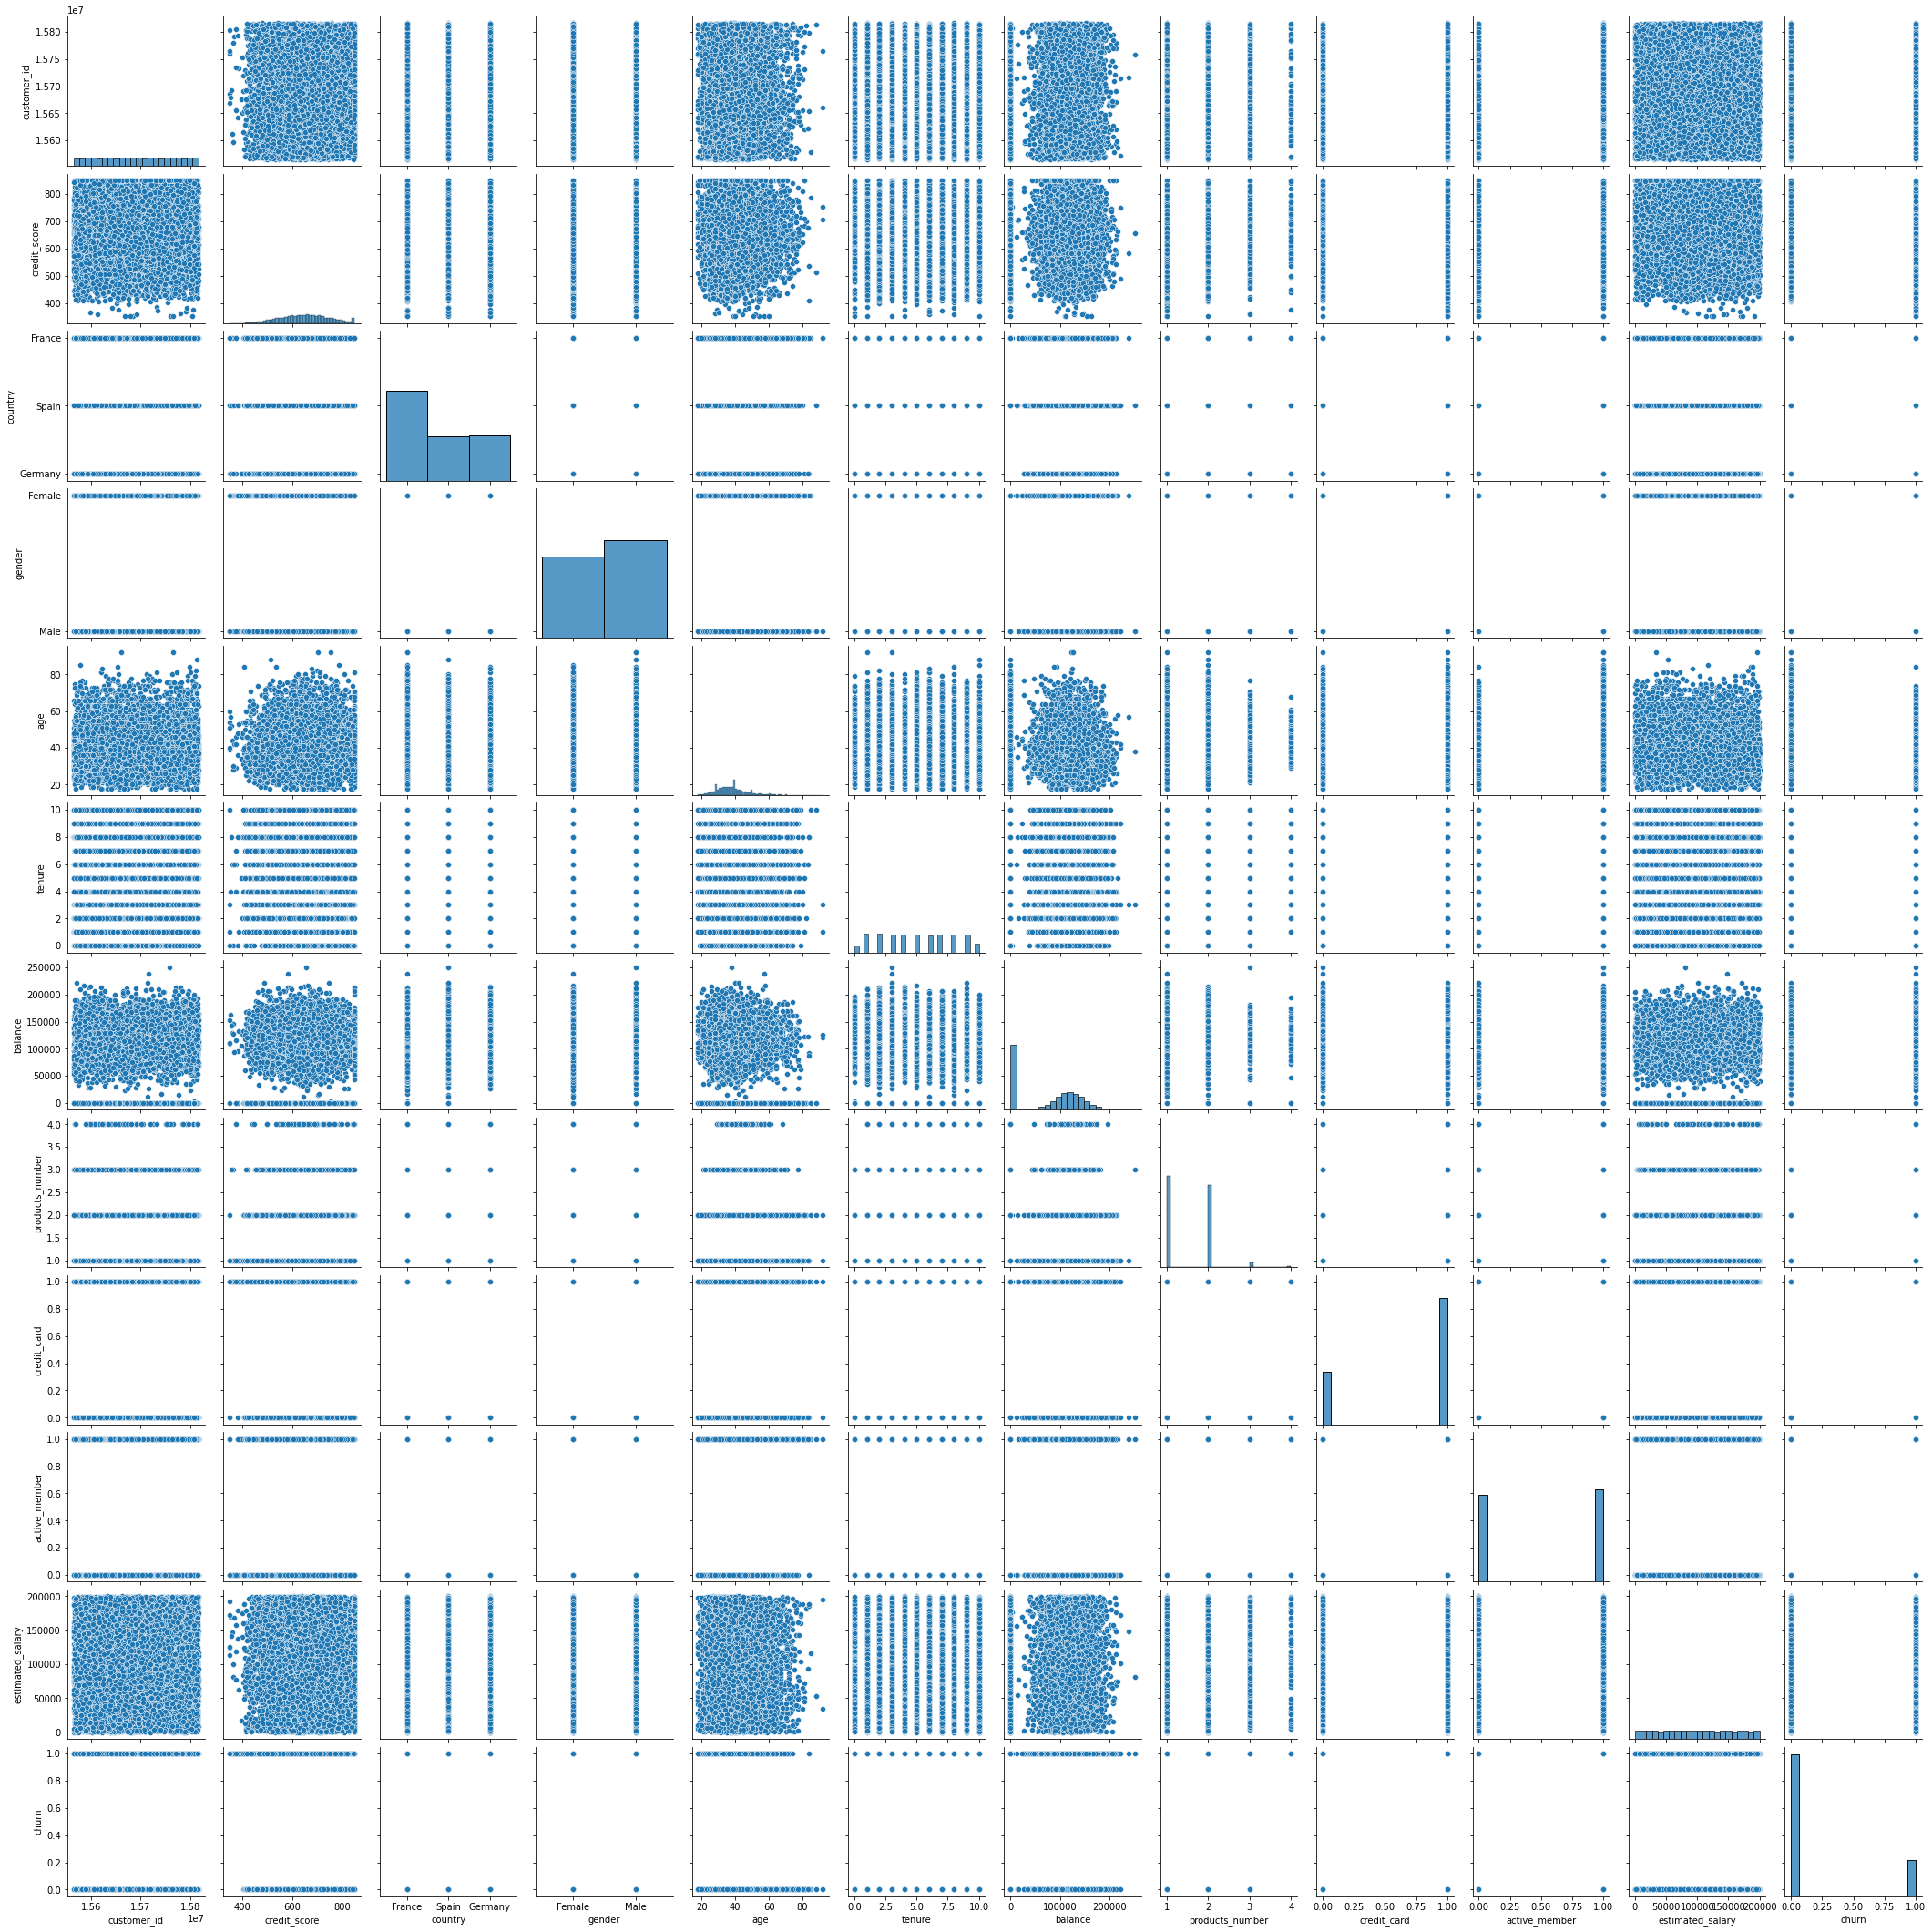

In [7]:
sns.pairplot(df, vars= df.columns )  
plt.show()

Data Cleaning

In [8]:
cleaned_df = df

le = LabelEncoder()

label = le.fit_transform(cleaned_df["country"])
cleaned_df.drop("country", axis=1, inplace=True)
cleaned_df["country"] = label
        
        
le2 = LabelEncoder()
label = le.fit_transform(cleaned_df['gender'])
cleaned_df.drop("gender", axis=1, inplace=True)
cleaned_df["gender"] = label
        
cleaned_df = cleaned_df.drop(['customer_id'], axis = 1)

Modeling and Prediction

In [53]:
def standardize(df, column):
    mu = df[column].mean()
    o = df[column].std()
    df[column] = (df[column] - mu ) / o
    return df

In [67]:
columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for column in columns:
    standardized_df = standardize(cleaned_df, column)
standardized_df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country,gender
0,-0.326205,0.293503,-1.041708,-1.225786,-0.911538,1,1,0.021885,1,0,0
1,-0.440014,0.198154,-1.387468,0.117344,-0.911538,0,1,0.216523,0,2,0
2,-1.536717,0.293503,1.032856,1.332987,2.526930,1,0,0.240675,1,0,0
3,0.501496,0.007456,-1.387468,-1.225786,0.807696,0,0,-0.108912,0,0,0
4,2.063781,0.388852,-1.041708,0.785689,-0.911538,1,1,-0.365258,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246426,0.007456,-0.004426,-1.225786,0.807696,1,0,-0.066416,0,0,1
9996,-1.391870,-0.373939,1.724377,-0.306363,-0.911538,1,1,0.027987,0,0,1
9997,0.604958,-0.278590,0.687096,-1.225786,-0.911538,0,1,-1.008593,1,0,0
9998,1.256772,0.293503,-0.695947,-0.022606,0.807696,1,0,-0.125224,1,1,1


In [71]:
labels = standardized_df['churn']

points = standardized_df.drop(columns = ['credit_card', 'active_member', 'churn', 'country', 'gender'])
points

,credit_score,age,tenure,balance,products_number,estimated_salary
0,-0.326205,0.293503,-1.041708,-1.225786,-0.911538,0.021885
1,-0.440014,0.198154,-1.387468,0.117344,-0.911538,0.216523
2,-1.536717,0.293503,1.032856,1.332987,2.526930,0.240675
3,0.501496,0.007456,-1.387468,-1.225786,0.807696,-0.108912
4,2.063781,0.388852,-1.041708,0.785689,-0.911538,-0.365258
...,...,...,...,...,...,...
9995,1.246426,0.007456,-0.004426,-1.225786,0.807696,-0.066416
9996,-1.391870,-0.373939,1.724377,-0.306363,-0.911538,0.027987
9997,0.604958,-0.278590,0.687096,-1.225786,-0.911538,-1.008593
9998,1.256772,0.293503,-0.695947,-0.022606,0.807696,-0.125224


In [94]:
pca = PCA()
components = pca.fit(points).components_
components = pd.DataFrame(components).transpose()
components.index =  points.columns
print(components)

var_ratio = pca.explained_variance_ratio_
var_ratio= pd.DataFrame(var_ratio).transpose()
print(var_ratio)

                         0         1         2         3         4         5
credit_score      0.015313 -0.122781 -0.954793  0.145254  0.223880 -0.042893
age              -0.134955  0.476259  0.152113  0.110174  0.848337  0.003503
tenure            0.062330 -0.582907  0.067940 -0.692503  0.414918 -0.000964
balance          -0.698421 -0.110358 -0.039413 -0.001646 -0.044779  0.704604
products_number   0.699867  0.043428  0.002118  0.070319  0.074530  0.705547
estimated_salary  0.007839 -0.635812  0.243019  0.694446  0.224688 -0.062317
          0         1         2         3         4         5
0  0.218515  0.168919  0.166859  0.165369  0.164661  0.115676


In [95]:
def run_pca_knn(n):
    pca_2 = PCA(n_components=n) 
    pca_matrix = pca_2.fit_transform(standardized_df)
    
    x_train, x_test, y_train, y_test = train_test_split(pca_matrix, labels, test_size=0.3, random_state=42)
    
    classifier = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    predictions = classifier.predict(x_test)
   

    return predictions, y_test

In [97]:
y_predictions, y_test = run_pca_knn(5)
print(accuracy_score(y_test, y_predictions))

0.8113333333333334
